In [57]:
# Import packages
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix

In [3]:
# Defien global environment
RAW_DATA_PATH = '../data/external'
FILE_NAME = 'housing.csv'

### Frame Business Questions & Background Intorduction

+ Business Question:
Predict house price based on house features, the data contains information from the 1990 California census.

+ Data source:
https://www.kaggle.com/camnugent/california-housing-prices

### Performance Measurment 

+ TBD

### Explore Data Set

In [66]:
csv_path = os.path.join(RAW_DATA_PATH, FILE_NAME)

raw_data_pd = pd.read_csv(csv_path)

raw_data_pd.describe()
raw_data_pd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [65]:
raw_data_pd.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


In [67]:
# which column has nan -> only total_bedrooms 
raw_data_pd.columns[raw_data_pd.isna().any()].tolist()

['total_bedrooms']

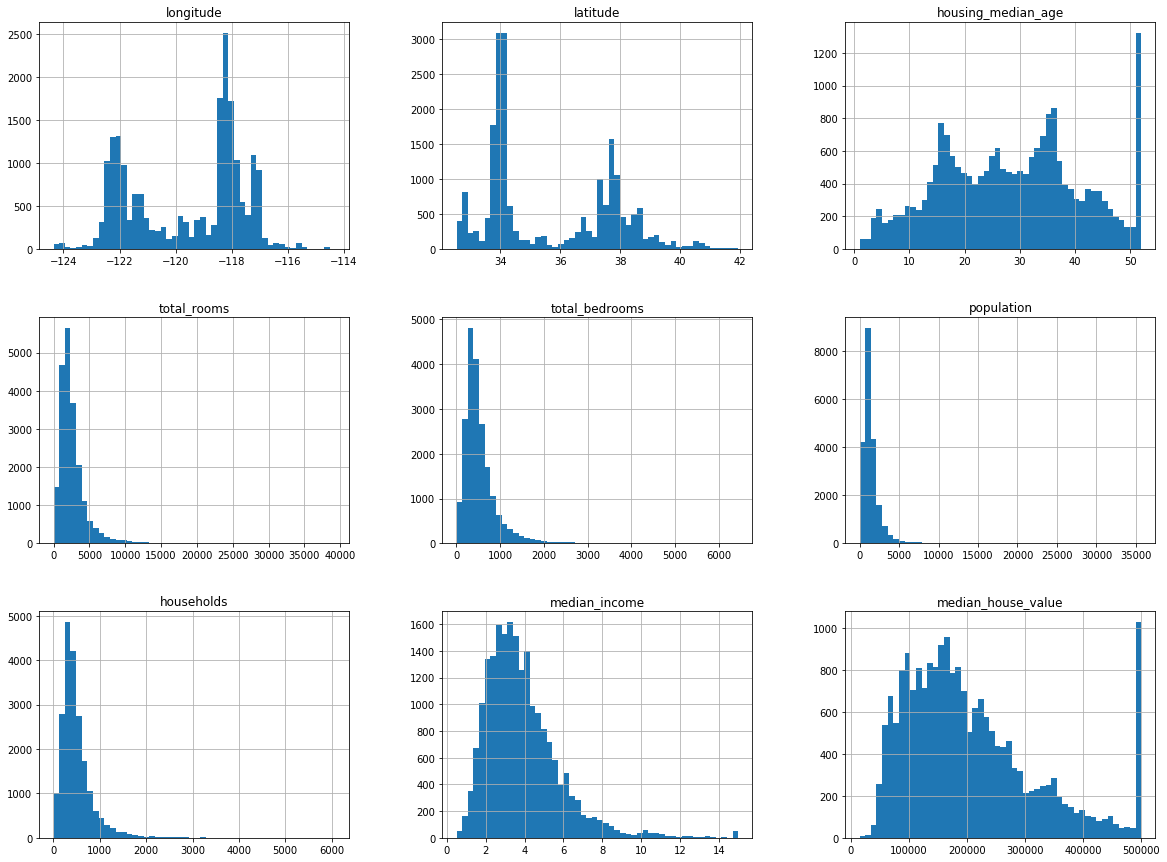

In [6]:
raw_data_pd.hist(bins= 50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6344da7c90>,
      dtype=object)

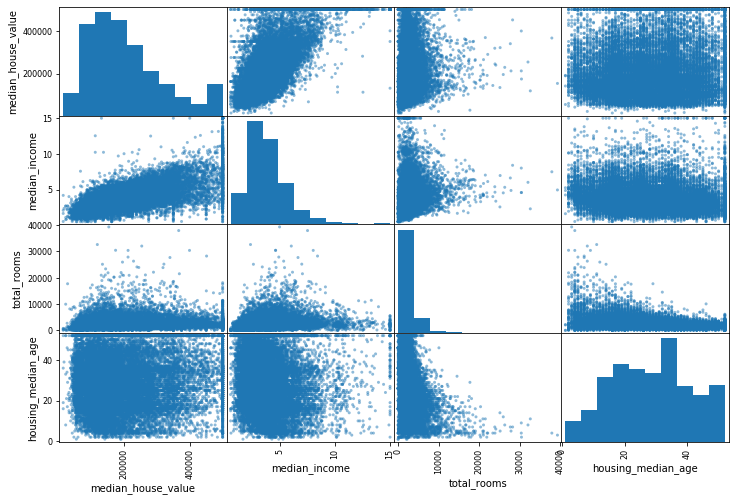

In [61]:
# Check correlations of each attributes
corr_matrix = raw_data_pd.corr()

# Plot scatter matrix

attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(raw_data_pd[attributes], figsize=(12,8))

### Prepare for test set - attempt

In [53]:
# Categorise the mediuam_income feature and apply stratified sampling
raw_data_pd["income_cat"] = pd.cut(raw_data_pd["median_income"], bins = [0.,1.5,3.0,4.5,6.,np.inf], labels=[1,2,3,4,5])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=35)

for train_index, test_index in split.split(raw_data_pd, raw_data_pd["income_cat"]):
    strat_train_set = raw_data_pd.loc[train_index]
    strat_test_set = raw_data_pd.loc[test_index]
    

# remove 'income_cat' column from both original and splitted dataset
for each_set in (strat_train_set, strat_test_set):
    each_set.drop("income_cat",axis=1,inplace=True)

raw_data_pd.drop("income_cat",axis=1,inplace=True)

# 
    

#### Feature Engineering - attempt

In [64]:
# Adding a few new features
raw_data_pd["rooms_per_household"] = raw_data_pd["total_rooms"]/raw_data_pd["households"]
raw_data_pd["bedrooms_per_room"] = raw_data_pd["total_bedrooms"]/raw_data_pd["total_rooms"]
raw_data_pd["population_per_household"] = raw_data_pd["population"]/raw_data_pd["households"]